In [5]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/hoang_colab/rices

/content/drive/.shortcut-targets-by-id/1bl-ENTOUwGj_fLdtVBVgOtQ7_goDg0tT/ai/rices


In [3]:
ls

Arborio/  Ipsala/  Jasmine/  rice_classification_weight.h5


In [7]:
import cv2
from pathlib import Path
flower_dataset_folder = '/content/drive/MyDrive/qviet/rices/'
classnames = []
for path in Path(flower_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(flower_dataset_folder+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Arborio', 'Ipsala', 'Jasmine']
Arborio
Ipsala
Jasmine


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(192, 128, 128, 3)
(48, 128, 128, 3)
(192, 3)
(48, 3)


[1. 0. 0.]


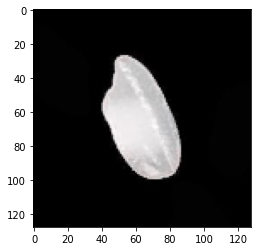

In [11]:
plt.imshow(X_train[2])
print(y_train[2])

In [12]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu',
                                       input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [13]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
2/2 - 9s - loss: 1.0476 - accuracy: 0.3177 - 9s/epoch - 5s/step
Epoch 2/100
2/2 - 7s - loss: 0.6095 - accuracy: 0.7760 - 7s/epoch - 4s/step
Epoch 3/100
2/2 - 7s - loss: 0.6783 - accuracy: 0.7135 - 7s/epoch - 4s/step
Epoch 4/100
2/2 - 7s - loss: 0.3361 - accuracy: 0.8281 - 7s/epoch - 4s/step
Epoch 5/100
2/2 - 7s - loss: 0.3383 - accuracy: 0.8385 - 7s/epoch - 4s/step
Epoch 6/100
2/2 - 9s - loss: 0.2546 - accuracy: 0.9583 - 9s/epoch - 4s/step
Epoch 7/100
2/2 - 7s - loss: 0.2051 - accuracy: 0.9375 - 7s/epoch - 4s/step
Epoch 8/100
2/2 - 7s - loss: 0.1269 - accuracy: 0.9844 - 7s/epoch - 4s/step
Epoch 9/100
2/2 - 7s - loss: 0.0620 - accuracy: 0.9792 - 7s/epoch - 4s/step
Epoch 10/100
2/2 - 7s - loss: 0.0237 - accuracy: 1.0000 - 7s/epoch - 4s/step
Epoch 11/100
2/2 - 7s - loss: 0.0133 - accuracy: 0.9948 - 7s/epoch - 4s/step
Epoch 12/100
2/2 - 7s - loss: 0.0021 - accuracy: 1.0000 - 7s/epoch - 4s/step
Epoch 13/100
2/2 - 7s - loss: 0.0046 - accuracy: 1.0000 - 7s/epoch - 4s/step
Epoch 14

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 183ms/step - loss: 0.0230 - accuracy: 0.9792


[0.02295759506523609, 0.9791666865348816]

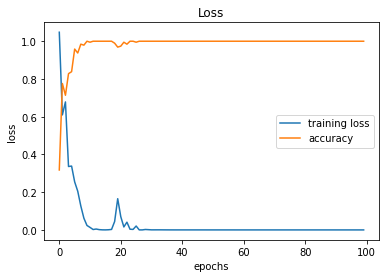

In [16]:
# plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
n = 0

(128, 128, 3)
1/1 [==============================] - 0s 129ms/step
Pred:  Arborio
True label:  Arborio


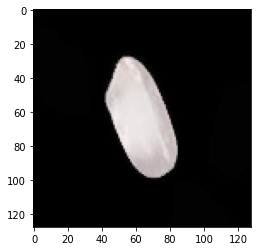

In [18]:
# n = 0
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 29ms/step
Pred:  Arborio
True label:  Arborio


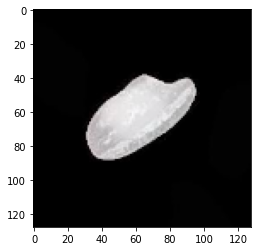

In [20]:
n = 2
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])